In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [43]:
# filename = ['1.csv', '2.csv', '3.csv', '4.csv', '5.csv']
filename = ['0912-100M.csv']
exec_time_dfs = []
for i, name in enumerate(filename):
    exec_time_df = pd.read_csv("../" + name)
    print("df loaded")
    not_arr = [210, 215, 220, 225, 230, 235, 236,240, 242, 245, 248, 249, 250, 252]
    exec_time_df = exec_time_df[~exec_time_df['prio'].isin(not_arr)]
    exec_time_df.sort_values(by='prio', inplace=True)
    exec_time_df.dropna(inplace=True)
    exec_time_dfs.append(exec_time_df)
prios = exec_time_dfs[0]['prio'].drop_duplicates()
prios = np.array(prios)
prios

df loaded


array([  0,   3,   6,   9,  11,  12,  15,  18,  21,  24,  27,  30,  36,
        39,  41,  45,  48,  51,  54,  57,  60,  63,  66,  69,  70,  72,
        75,  78,  81,  84,  87,  90,  96,  99, 105, 108, 111, 114, 117,
       120, 123, 126, 180, 200, 205, 253])

In [44]:
hm_dfs = []
for i in range(len(filename)):
    hm_df = exec_time_dfs[i][exec_time_dfs[i]['tm'].isin(['hit', 'miss'])]
    hm_dfs.append(hm_df)
hm_dfs[0]

,prio,tm,round
1290102,0,hit,44821
5807553,0,hit,5173
5807525,0,hit,5172
1290128,0,hit,44822
5807503,0,hit,5171
...,...,...,...
3383159,253,hit,52002
2289365,253,hit,14002
3463722,253,hit,54802
2220241,253,hit,11602


In [45]:
tm_dfs = []
for i in range(len(filename)):
    tm_df = exec_time_dfs[i][~exec_time_dfs[i]['tm'].isin(['hit', 'miss'])]
    tm_df['tm'] = tm_df['tm'].astype(int)
    tm_dfs.append(copy.deepcopy(tm_df))

/tmp/ipykernel_7236/1109762974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tm_df['tm'] = tm_df['tm'].astype(int)


In [46]:
# threshold = [535, 2063, 406, 541, 580, 495, 873, 524, 178, 716, 208, 449, 468, 534, 536, 1607, 1330, 1074, 354, 231, 477, 378, 542, 280, 146, 348, 378, 274, 251, 532, 720, 521, 151, 2, 513, 286, 72, 278, 276, 355, 455,312, 200, 826, 3593]
periods = [2500, 20000, 2500, 20000, 5000, 2500, 2500, 20000, 100000, 20000, 20000, 50000, 20000, 100000, 100000, 100000, 100000, 2500, 2500, 142857, 100000, 100000, 20000, 100000, 2500, 100000, 20000, 20000, 100000, 100000, 100000, 333333, 1000000, 333333, 10000000, 20000, 2500, 10000000, 200000, 1000000, 100000, 20000, 20000, 20000, 2500, 1000000]

In [31]:
len(periods)

45

In [32]:
len(prios)

45

In [33]:
def n_k_analysis_window(arr, n, k):
    tot = len(arr) - n + 1
    hit = 0
    result_arr = []
    for i in range(tot):
        if np.sum(arr[i:i+n]) >= k:
            hit += 1
            result_arr.append(1)
        else:
            result_arr.append(0)
    return hit / tot, result_arr

In [42]:
# deadline miss rate
for idx, prio in enumerate(prios):
    dfidx = hm_dfs[0][hm_dfs[0]['prio'] == prio]
    hit_rate = float((dfidx[dfidx['tm'] == 'hit']['tm'].count()) / dfidx['tm'].count())
    if hit_rate < 1:
        print(prio, 1-hit_rate)


6 0.00037198793105819306
11 6.8886653900035455e-06
12 0.000819751181406092
15 0.0012020762508998528
51 0.0029173598410090484
54 0.004112547402791988
70 0.006651029342371273
111 0.03488776603256283
205 0.041562905786843296


In [38]:
# (n,k)
n, k = 5,4
for idx, prio in enumerate(prios):
    dfidx = hm_dfs[0][hm_dfs[0]['prio'] == prio]
    dfidx['tm'] = dfidx['tm'].replace({"hit" : 1, "miss": 0})
    hit_rate, _ = n_k_analysis_window(dfidx['tm'], n, k)
    if (hit_rate < 1):
        print(f"{prio}\t{1-hit_rate}")



/tmp/ipykernel_7236/4069974860.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfidx['tm'] = dfidx['tm'].replace({"hit" : 1, "miss": 0})


6	6.888760298751073e-06
15	2.0666352078868577e-05
51	6.199905623660573e-05
54	0.0001756639926703274
70	0.0003788831214458499
111	0.01143538148363743
205	0.017841950628084913


In [39]:
# (n,k)
n, k = 4, 3
for idx, prio in enumerate(prios):
    dfidx = hm_dfs[0][hm_dfs[0]['prio'] == prio]
    dfidx['tm'] = dfidx['tm'].replace({"hit" : 1, "miss": 0})
    hit_rate, _ = n_k_analysis_window(dfidx['tm'], n, k)
    if 0 < hit_rate < 1:
        print(prio,1-hit_rate)

/tmp/ipykernel_7236/132849736.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfidx['tm'] = dfidx['tm'].replace({"hit" : 1, "miss": 0})


6 3.4443682855878066e-06
15 1.3777520597391124e-05
51 4.133256179217337e-05
54 9.644264418173787e-05
70 0.00023766223030508016
111 0.007050646165716046
205 0.011332010691356031


In [40]:
# (n,k)
n, k = 50, 49
for idx, prio in enumerate(prios):
    dfidx = hm_dfs[0][hm_dfs[0]['prio'] == prio]
    dfidx['tm'] = dfidx['tm'].replace({"hit" : 1, "miss": 0})
    hit_rate, _ = n_k_analysis_window(dfidx['tm'], n, k)
    if 0 < hit_rate < 1:
        print(prio,1-hit_rate)

/tmp/ipykernel_7236/850251499.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfidx['tm'] = dfidx['tm'].replace({"hit" : 1, "miss": 0})


6 0.0002618134716810827
12 0.0007268768753251331
15 0.0018843745047918414
51 0.008891353924804113
54 0.019546509945501223
70 0.04357831350204289
111 0.5297779400720679
205 0.623579829269469


In [41]:
# (n,k)
n, k = 10, 9
for idx, prio in enumerate(prios):
    dfidx = hm_dfs[0][hm_dfs[0]['prio'] == prio]
    dfidx['tm'] = dfidx['tm'].replace({"hit" : 1, "miss": 0})
    hit_rate, _ = n_k_analysis_window(dfidx['tm'], n, k)
    # if 0 < hit_rate < 1:
    print(prio,1-hit_rate)

/tmp/ipykernel_7236/3362489115.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfidx['tm'] = dfidx['tm'].replace({"hit" : 1, "miss": 0})


3 0.0
6 2.4111076283972466e-05
9 0.0
11 0.0
12 6.888878938293708e-06
15 0.00011366689400049701
18 0.0
21 0.0
24 0.0
27 0.0
30 0.0
36 0.0
39 0.0
41 0.0
45 0.0
48 0.0
51 0.000258333850001069
54 0.0008438905766700033
57 0.0
60 0.0
63 0.0
66 0.0
69 0.0
70 0.0016705588966733353
72 0.0
75 0.0
78 0.0
81 0.0
84 0.0
87 0.0
90 0.0
96 0.0
99 0.0
105 0.0
108 0.0
111 0.04516364588284727
114 0.0
117 0.0
120 0.0
123 0.0
126 0.0
180 0.0
200 0.0
205 0.06424935072092364
253 0.0


In [25]:
def ecdf(data):
    """Compute the empirical cumulative distribution function."""
    sorted_data = np.sort(data)
    n = len(data)
    return sorted_data, np.arange(1, n+1) / n

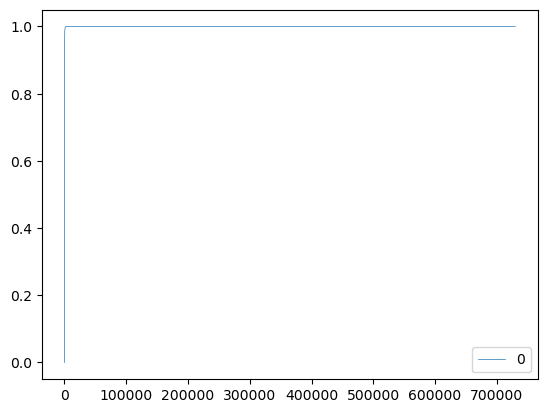

In [26]:
# The cdf for task.prio==6
prio = 6
for i in range(len(filename)):
    dfidx = tm_dfs[i][tm_dfs[i]['prio'] == prio]['tm'].to_numpy()
    x, y = ecdf(dfidx)
    plt.plot(x,y,label=f"dataset {i}",lw=0.5)

plt.legend()
plt.legend([0,3000])


(0.0, 500.0)

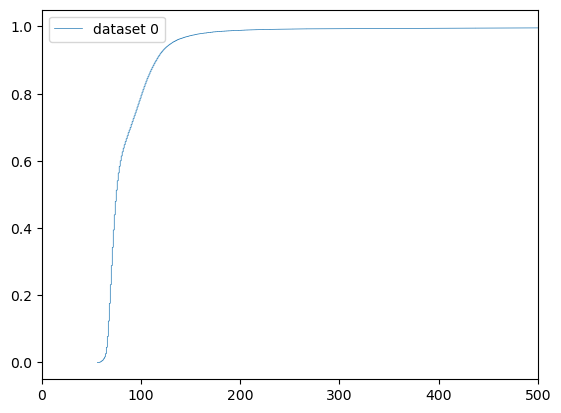

In [27]:
# The cdf for task.prio==6
prio = 9
for i in range(len(filename)):
    dfidx = tm_dfs[i][tm_dfs[i]['prio'] == prio]['tm'].to_numpy()
    x, y = ecdf(dfidx)
    plt.plot(x,y,label=f"dataset {i}",lw=0.5)

plt.legend()
plt.xlim([0,500])


(0.0, 500.0)

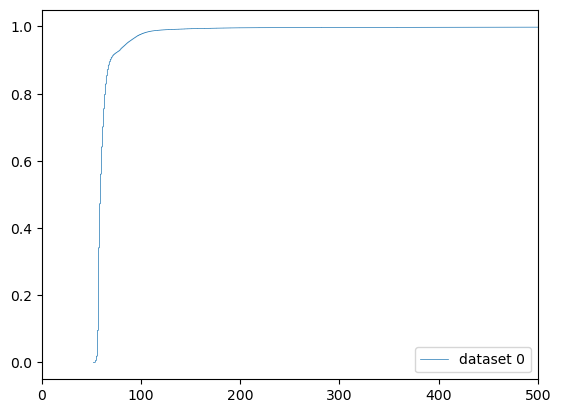

In [29]:
# The cdf for task.prio==6
prio = 111
for i in range(len(filename)):
    dfidx = tm_dfs[i][tm_dfs[i]['prio'] == prio]['tm'].to_numpy()
    x, y = ecdf(dfidx)
    plt.plot(x,y,label=f"dataset {i}",lw=0.5)

plt.legend()
plt.xlim([0,500])


In [36]:
with open("tasks/prios.txt", 'w') as f:
    f.write(f"{prios.tolist()}\n")

In [37]:
pers_idx = np.arange(1, 10001) / 100
for idx, prio in enumerate(prios):
    pers_all = []
    for i in range(len(filename)):
        # dfidx = tm_dfs[i][tm_dfs[i]['tm'] < periods[idx]]
        dfidx = tm_dfs[i]
        dfidx = dfidx[dfidx['prio'] == prio]['tm'].to_numpy()
        pers = np.percentile(dfidx, pers_idx)
        pers_all.append(pers)
    pers_max = np.mean(np.array(pers_all), axis=0)
    with open(f"tasks/{prio}.txt", 'w') as f:
        f.write(f"{periods[idx]}\n")
        f.write(f"{pers_max.tolist()}")

### iid analysis

In [21]:
def num_turning_points(arr):
    trend = (arr[1] - arr[0])
    tp = 0
    for i in range(2, len(arr)):
        if arr[i] >arr[i-1]:
            if trend < 0:
                tp += 1
            trend = 1
        elif arr[i] < arr[i-1]:
            if trend > 0:
                tp+=1
            trend = -1
           
    return tp

In [22]:
for idx, prio in enumerate(prios):
    pers_all = []
    for i in range(len(filename)):
        dfidx = tm_dfs[i][tm_dfs[i]['tm'] < periods[idx]]
        dfidx = dfidx[dfidx['prio'] == prio]['tm'].to_numpy()
        print(prio, num_turning_points(dfidx), len(dfidx) * 2/3)


3 934143 972096.0
6 967174 971920.0
9 119379 121516.0
11 478339 486064.0
12 960813 971592.6666666666
15 952092 971332.6666666666
18 119014 121516.0
21 23690 24297.333333333332
24 117938 121516.0
27 118391 121516.0
30 47466 48594.666666666664
36 118192 121516.0
39 23721 24297.333333333332
41 23493 24297.333333333332
45 23709 24297.333333333332
48 23630 24297.333333333332
51 955397 970074.0
54 952159 969202.6666666666
57 16615 17043.333333333332
60 23657 24297.333333333332
63 23676 24297.333333333332
66 118375 121516.0
69 23751 24297.333333333332
70 943664 966668.0
72 23678 24297.333333333332
75 346966 364548.6666666667
78 236915 243032.0
81 23518 24297.333333333332
84 23526 24297.333333333332
87 23533 24297.333333333332
90 7162 7298.0
96 2404 2418.0
99 7139 7298.0
105 224 237.33333333333334
108 118577 121516.0
111 916563 940465.3333333334
114 239 237.33333333333334
117 11849 12148.666666666666
120 2409 2418.0
123 23603 24297.333333333332
126 118125 121516.0
180 118791 121516.0
200 11857

In [23]:
import statsmodels.api as sm

In [24]:
# The closer p_value is to 1.0, the closer the distribution is to i.i.d.
for idx, prio in enumerate(prios):
    for i in range(len(filename)):
        try:
            dfidx = tm_dfs[i][tm_dfs[i]['tm'] < periods[idx]]
            dfidx = dfidx[dfidx['prio'] == prio]['tm'].to_numpy()
            z = sm.stats.diagnostic.acorr_ljungbox(dfidx, 10)
            print(prio ,z)
            print()
        except Exception as e:
            print(e)

3         lb_stat      lb_pvalue
1    236.273593   2.554198e-53
2    475.680185  5.097535e-104
3    647.084753  6.243404e-140
4    865.012686  6.336907e-186
5    968.655835  3.668388e-207
6   1014.670367  6.003456e-216
7   1048.366407  4.259229e-222
8   1096.565139  2.114200e-231
9   1142.190027  3.648272e-240
10  1153.492629  1.545266e-241

6        lb_stat      lb_pvalue
1    51.871677   5.924892e-13
2    87.682083   9.121738e-20
3   192.087517   2.161020e-41
4   292.973366   3.551361e-62
5   299.715153   1.153196e-62
6   366.726732   3.950335e-76
7   559.145654  1.519190e-116
8   673.297274  4.005066e-140
9   743.721149  2.740227e-154
10  751.917074  4.449012e-155

9      lb_stat  lb_pvalue
1   0.474105   0.491105
2   1.213061   0.545239
3   1.574766   0.665125
4   1.683704   0.793676
5   2.204177   0.820232
6   3.504528   0.743367
7   3.723631   0.811002
8   8.419904   0.393563
9   8.538157   0.480950
10  8.556908   0.574606

11      lb_stat  lb_pvalue
1   0.008464   0.926697
2   4